# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Load-in Data:

In [2]:
df = pd.read_csv('datasets/dataframe_for_modeling.csv')
df.drop(columns='Unnamed: 0', inplace=True)
movies = pd.read_csv('datasets/movie_dataframe_no_ratings.csv')
movies.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df.head(3)

,movieId,title,genres,imdbId,tmdbId,year,decade,(no genres listed),action,adventure,...,musical,mystery,romance,sci-fi,thriller,war,western,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,1990s,0,0,1,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,1990s,0,0,1,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,1990s,0,0,1,...,0,0,0,0,0,0,0,7,4.5,1106635946


In [4]:
movies.head(3)

,movieId,title,genres,imdbId,tmdbId,year,decade,(no genres listed),action,adventure,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,1990s,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,1995,1990s,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1995,1990s,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Range of years: 1902 - 2018

In [5]:
film_count = movies.shape[0]
print(f'There are {film_count} films in the dataset')

There are 9734 films in the dataset


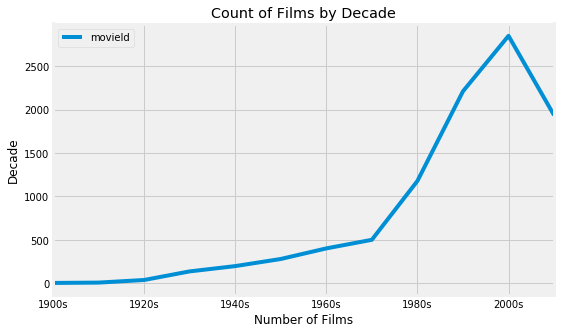

In [6]:
movies.groupby('decade').count()[['movieId']].plot(figsize=(8, 5))
plt.title(f'Count of Films by Decade')
plt.xlabel(f'Number of Films')
plt.ylabel('Decade')
plt.savefig(f'assets/count_of_movies_over_the_decades.jpeg', bbox_inches='tight');

## Genre Totals

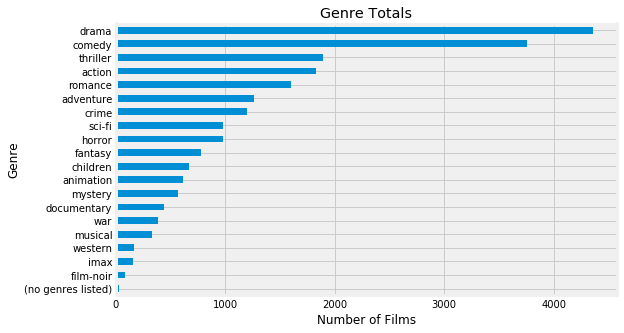

In [7]:
movies.iloc[:, 7:].sum().sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Genre Totals')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.savefig('assets/genretotals.jpeg', bbox_inches='tight');

In [8]:
genre_list = list(movies.iloc[:, 7:].columns)

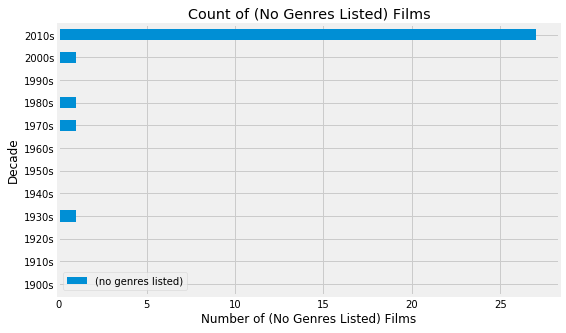

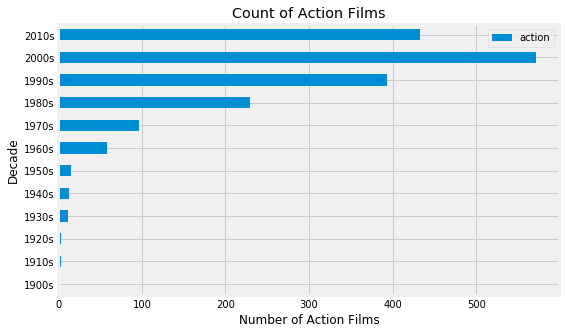

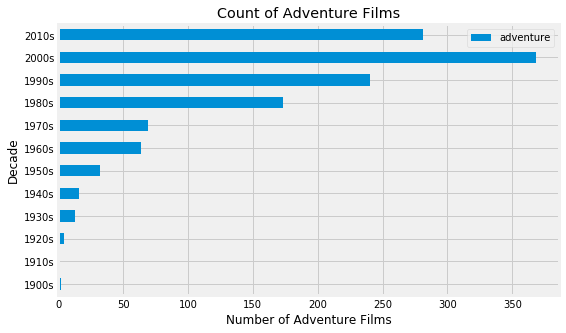

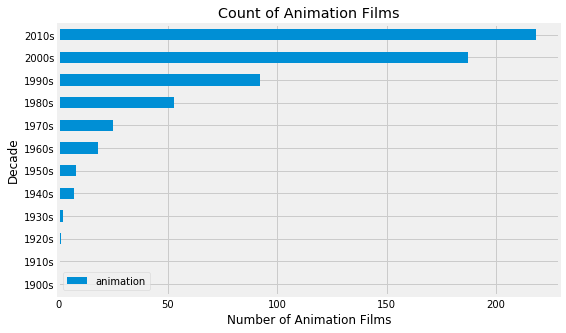

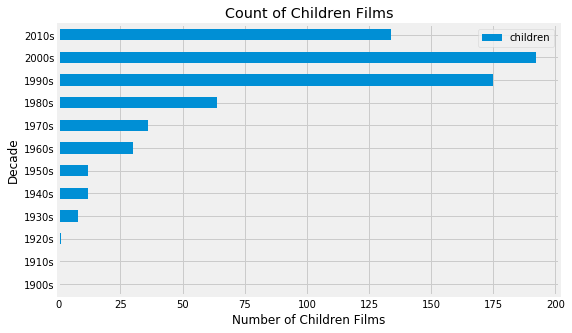

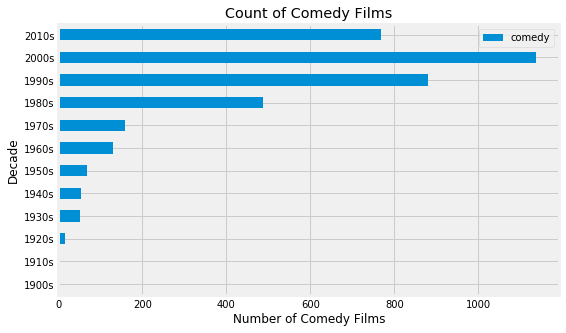

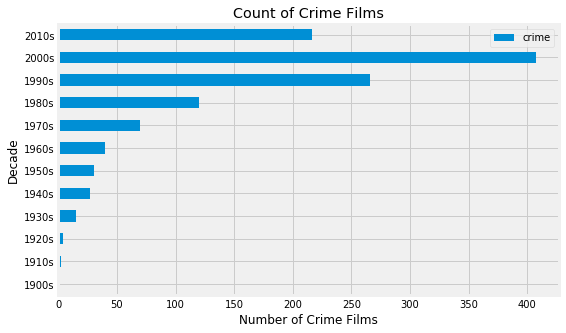

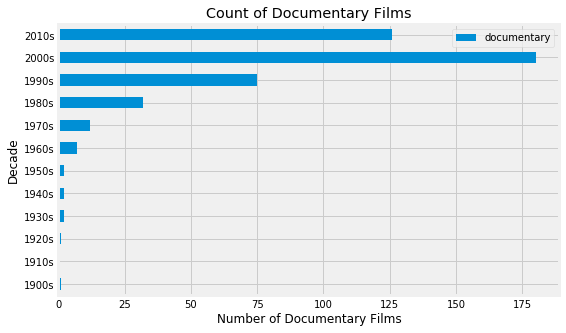

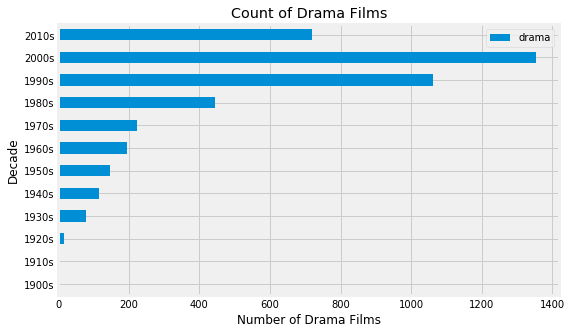

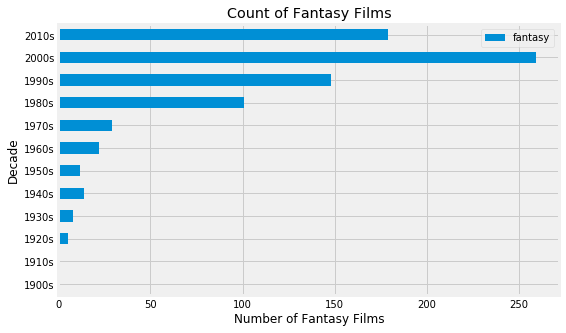

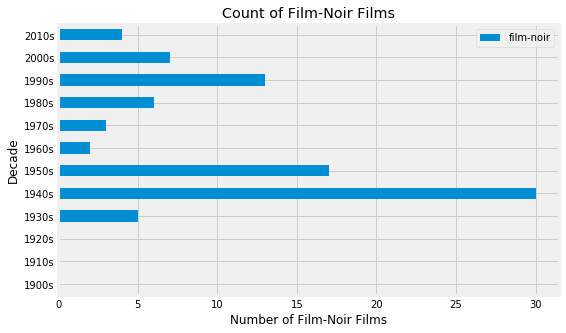

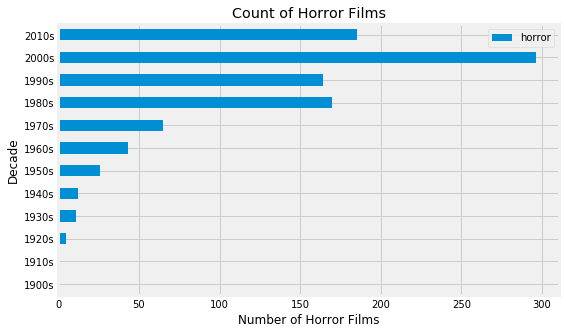

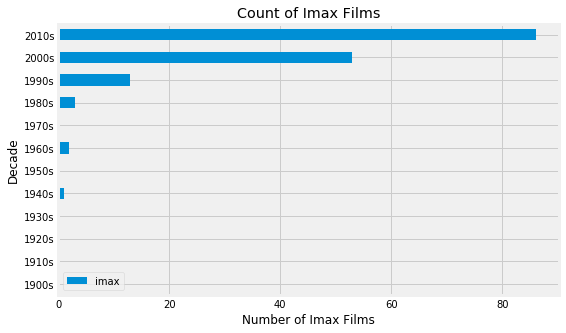

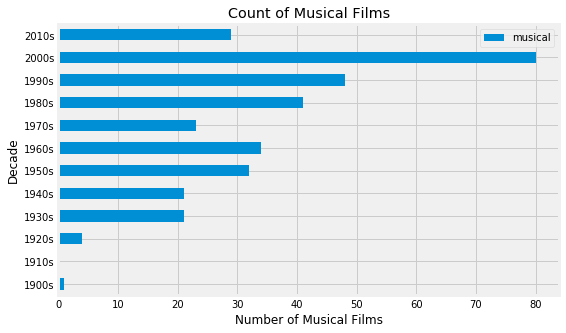

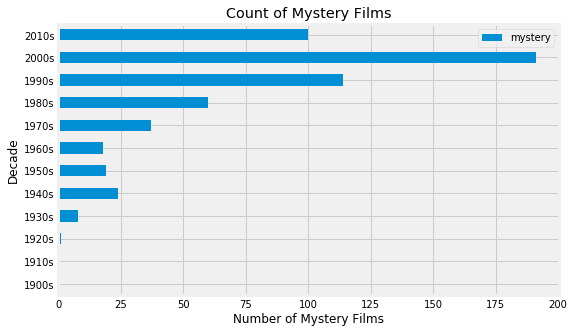

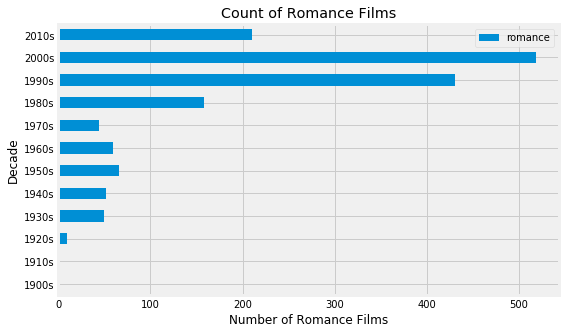

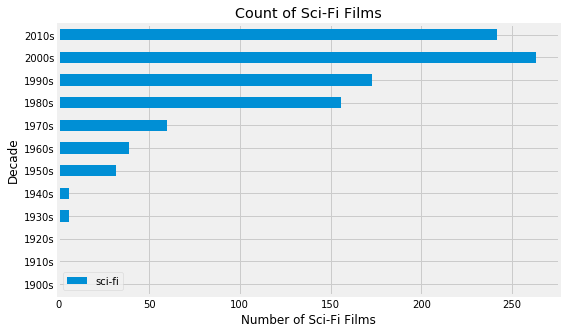

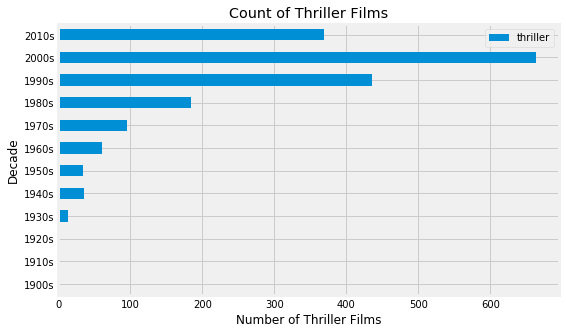

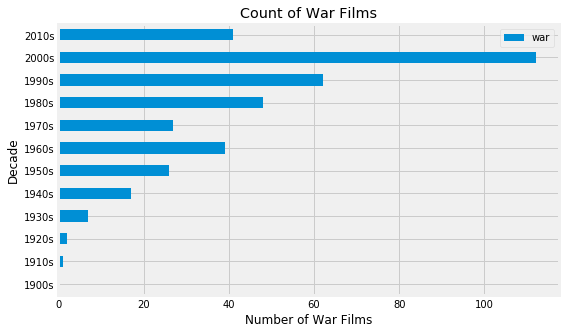

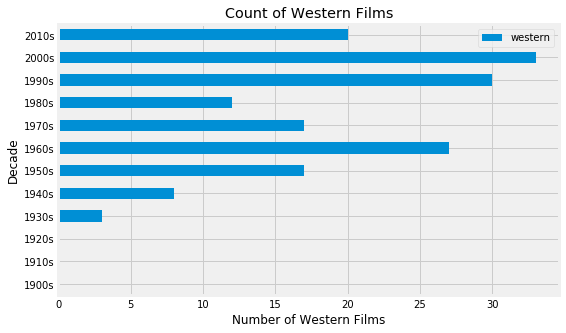

In [9]:
for genre in genre_list:

    movies.groupby('decade').sum()[[genre]].plot(kind='barh', figsize=(8, 5))
    plt.title(f'Count of {genre.title()} Films')
    plt.xlabel(f'Number of {genre.title()} Films')
    plt.ylabel('Decade')
    plt.savefig(f'assets/count_of_{genre}_by_decade.jpeg', bbox_inches='tight')
    plt.show()

## Ratings

The ratings distribution shows that non-integer ratings have fewer ratings than integer ratings. <br> The distribution is also right skewed which means that users tend to give ratings >= 3. <br>If the ratings were normally distributed, then we'd expect the mean to be 3.

Ratings ranged from 0.5 - 5.0 <br>
The average rating is 3.5. <br>

In [10]:
df['rating'].describe()

count    100827.000000
mean          3.501542
std           1.042508
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [11]:
ratings_user_count = len(df['userId'].unique())
print(f'There are {ratings_user_count} users who gave ratings for at least one film.')

There are 610 users who gave ratings for at least one film.


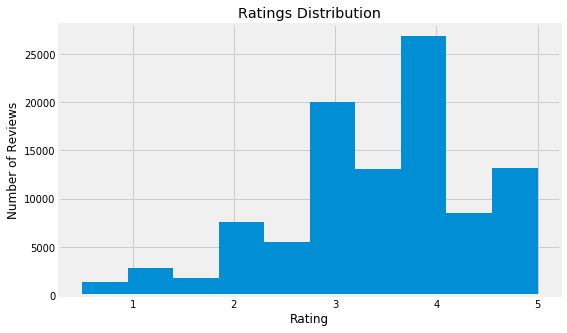

In [12]:
plt.figure(figsize=(8, 5))
plt.title('Ratings Distribution')
df['rating'].hist(bins=10)  # one bin per possible value
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.savefig('assets/ratings_dist.jpeg', bbox_inches='tight');

### Average Rating by Decade

In [13]:
df[['decade', 'rating']].groupby('decade').mean().round(2).sort_values(by='rating', ascending=False)

,rating
decade,
1940s,3.87
1950s,3.85
1960s,3.81
1970s,3.78
1920s,3.74
1930s,3.73
1980s,3.52
2010s,3.49
2000s,3.47


## Ratings Count

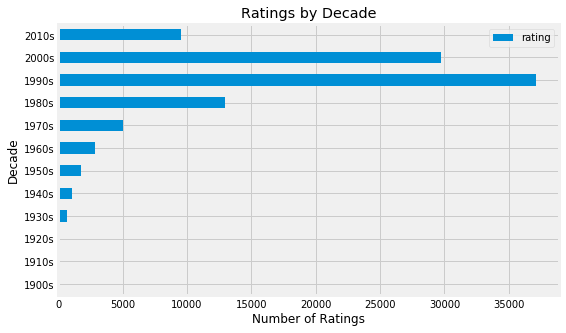

In [14]:
ratings_by_decade = df[['decade', 'rating']].groupby('decade').count()
ratings_by_decade.plot(kind='barh', figsize=(8, 5))
plt.title('Ratings by Decade')
plt.xlabel('Number of Ratings')
plt.ylabel('Decade')
plt.savefig('assets/ratings_totals_by_decade.jpeg', bbox_inches='tight');

### Ratings by Decade Histograms

In [15]:
decades = sorted(list(set(df['decade'])))

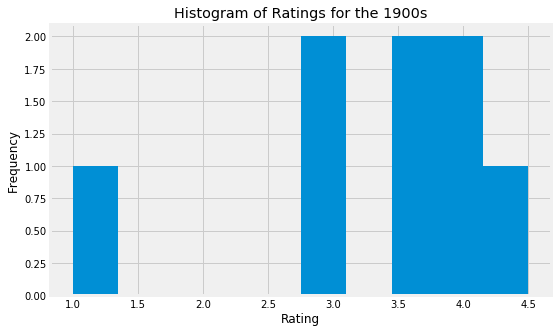

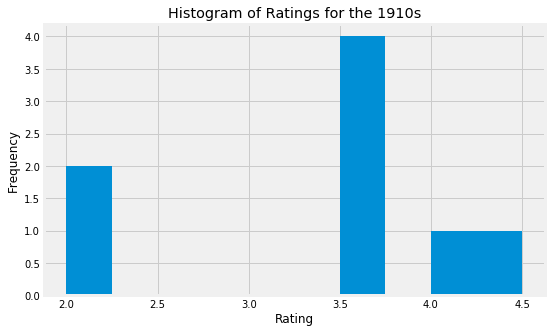

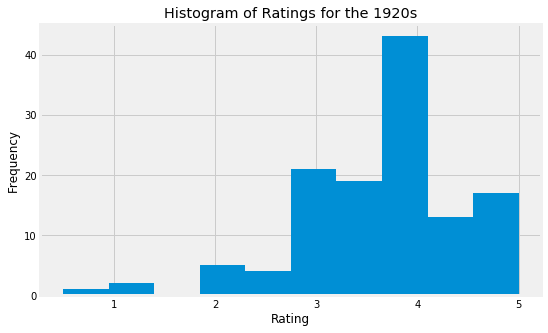

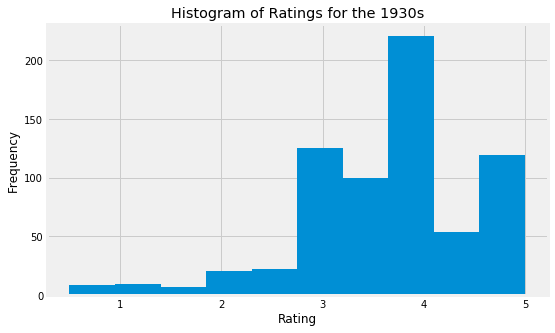

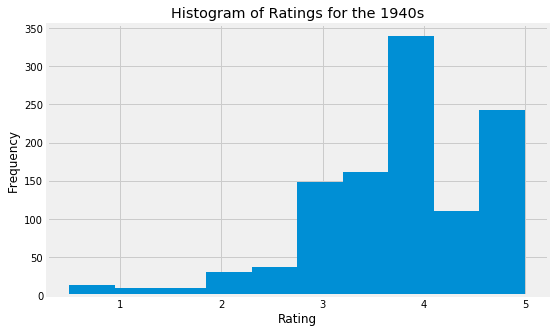

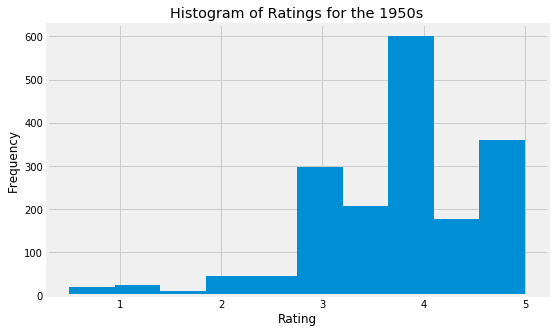

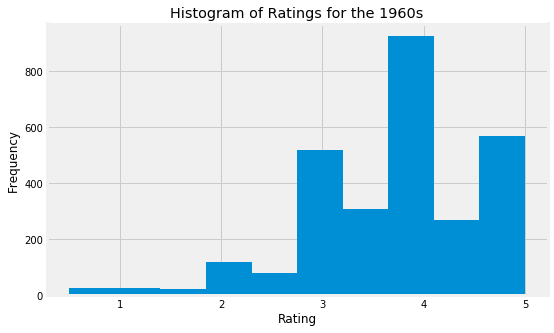

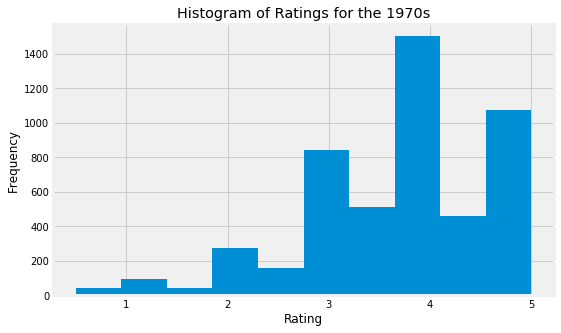

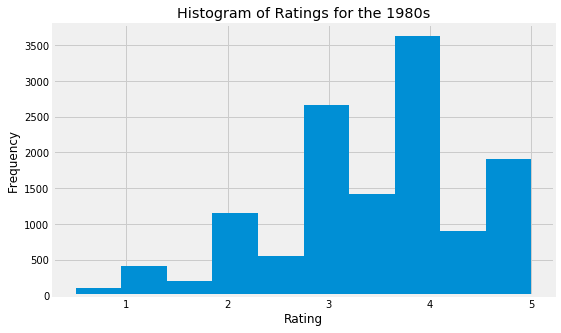

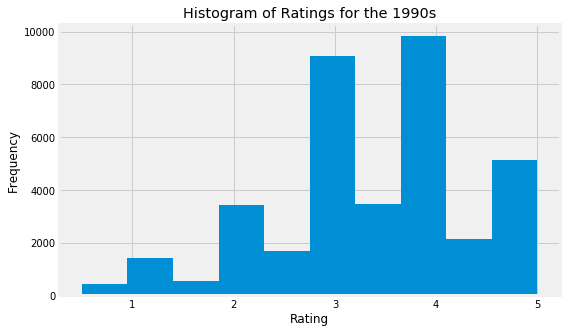

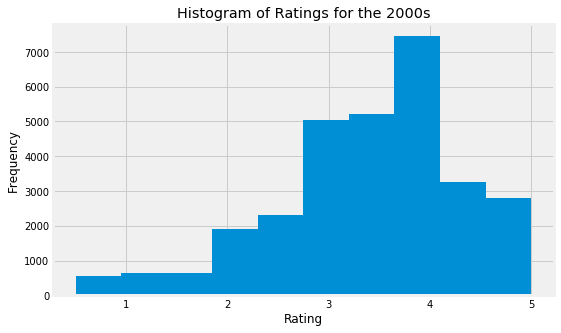

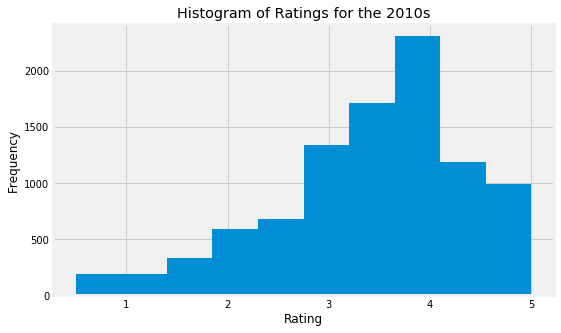

In [19]:
for decade in decades:
    plt.figure(figsize=(8, 5))
    plt.hist(df[df['decade'] == decade]['rating'], bins=10)
    plt.title(f'Histogram of Ratings for the {decade}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.savefig(f'assets/hist_of_ratings_for_{decade}.jpeg', bbox_inches='tight')
    plt.show();

In [17]:
average_number_of_ratings_per_user = round(df.groupby('userId')['rating'].count().mean(), )
print(f'Each user gave {average_number_of_ratings_per_user} ratings on average.')

Each user gave 165 ratings on average.


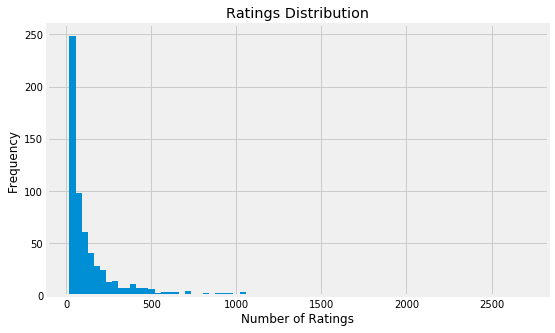

In [18]:
plt.figure(figsize=(8, 5))
plt.title('Ratings Distribution')
df.groupby('userId')['rating'].count().hist(bins=75)  # one bin per possible value
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.savefig('assets/ratings_dist.jpeg', bbox_inches='tight');